<a href="https://colab.research.google.com/github/Ximenaloranca/Investigaci-n-de-operaciones/blob/main/Problemas_de_redes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tutorial de las funciones básicas de NetworkX**


NetworkX es una libreria utilizada para:
- Crear, manipular y estudiar redes de nodos.
- Representar relaciones entre elementos.
- Calcular métricas.

En este tutorial se explica:
1. Cómo crear redes en NetworkX.
2. Agregar nodos y aristas.
3. Visualizar redes.
4. Usar funciones y métricas básicas.
5. Ejemplos.






In [ ]:
# Instalación en Google Colab
!pip install networkx matplotlib

# Importación de librerías
import networkx as nx
import matplotlib.pyplot as plt


## Como se crean los grafos
NetworkX permite crear diferentes tipos de grafos:
- **Red simple (nx.Graph())**: No dirigido, sin múltiples aristas ni lazos.
- **Red dirigida (nx.DiGraph())**: Las aristas tienen dirección.
- **Multigrafo (nx.MultiGraph())**: Permite múltiples aristas entre nodos.


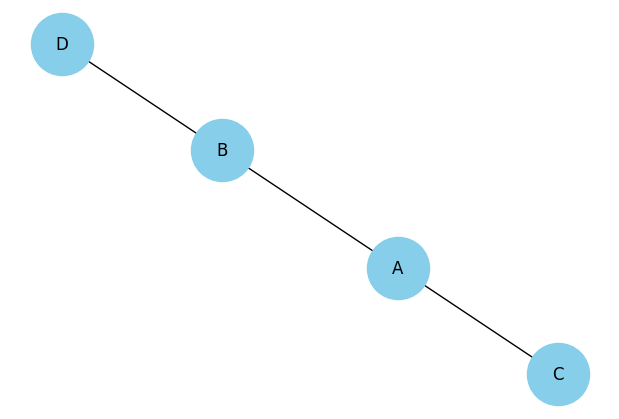

In [ ]:
# Red simple
G = nx.Graph()

# Agregar nodos
G.add_node("A")
G.add_nodes_from(["B", "C", "D"])

# Agregar aristas
G.add_edge("A", "B")
G.add_edges_from([("A", "C"), ("B", "D")])

# Dibujar la red
plt.figure(figsize=(6,4))
nx.draw(G, with_labels=True, node_color="skyblue", node_size=2000, font_size=12, font_color="black")
plt.show()


In [ ]:
# Listar nodos
print("Nodos:", G.nodes())

# Listar aristas
print("Aristas:", G.edges())

# Grado de cada nodo
print("Grado de los nodos:", dict(G.degree()))


Nodos: ['A', 'B', 'C', 'D']
Aristas: [('A', 'B'), ('A', 'C'), ('B', 'D')]
Grado de los nodos: {'A': 2, 'B': 2, 'C': 1, 'D': 1}


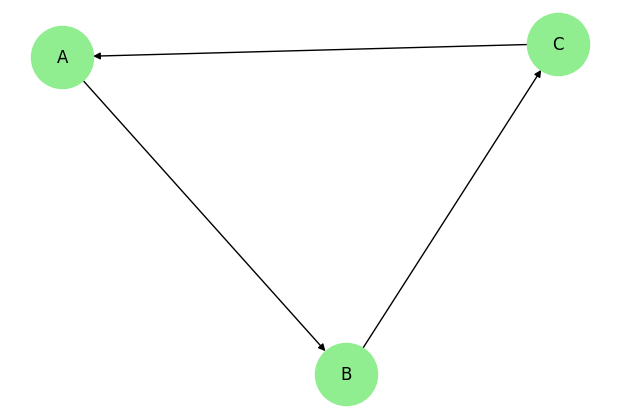

Grado de entrada: {'A': 1, 'B': 1, 'C': 1}
Grado de salida: {'A': 1, 'B': 1, 'C': 1}


In [ ]:
# Crear una red dirigida
DG = nx.DiGraph()
DG.add_edges_from([("A","B"), ("B","C"), ("C","A")])

plt.figure(figsize=(6,4))
nx.draw(DG, with_labels=True, node_color="lightgreen", node_size=2000, arrows=True, font_size=12)
plt.show()

print("Grado de entrada:", dict(DG.in_degree()))
print("Grado de salida:", dict(DG.out_degree()))


In [ ]:
# Caminos más cortos
print("Camino más corto de A a D:", nx.shortest_path(G, source="A", target="D"))

# Longitud del camino más corto
print("Longitud:", nx.shortest_path_length(G, "A", "D"))

# Componentes conexos
print("Componentes conexos:", list(nx.connected_components(G))) #Un componente conexo, es un subgrafo inducido de un grafo en que dos vertices cualquiera son conectados por un camino


Camino más corto de A a D: ['A', 'B', 'D']
Longitud: 2
Componentes conexas: [{'C', 'D', 'A', 'B'}]


In [ ]:
# Centralidad de grado
print("Centralidad de grado:", nx.degree_centrality(G)) #Medida que cuantifica el número de conexiones que tiene un nodo

# Centralidad de cercanía
print("Centralidad de cercanía:", nx.closeness_centrality(G)) #Mide la rapidez con la que un nodo puede llegar a los demás nodos

# Centralidad de intermediación
print("Centralidad de intermediación:", nx.betweenness_centrality(G)) #Mide la importancia de un nodo al contar cuantas veces actua como intermediario en los caminos mas cortos


Centralidad de grado: {'A': 0.6666666666666666, 'B': 0.6666666666666666, 'C': 0.3333333333333333, 'D': 0.3333333333333333}
Centralidad de cercanía: {'A': 0.75, 'B': 0.75, 'C': 0.5, 'D': 0.5}
Centralidad de intermediación: {'A': 0.6666666666666666, 'B': 0.6666666666666666, 'C': 0.0, 'D': 0.0}


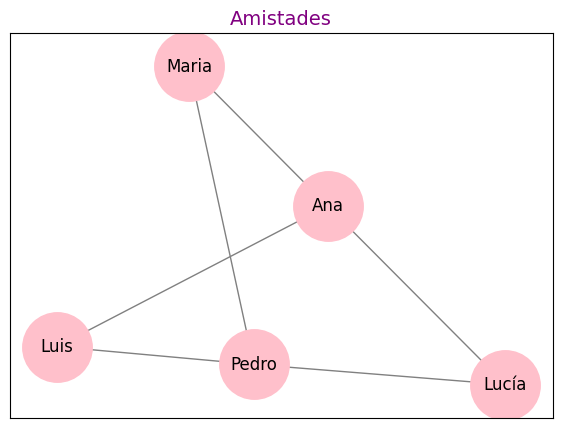

Centralidad de grado: {'Ana': 0.75, 'Luis': 0.5, 'Maria': 0.5, 'Pedro': 0.75, 'Lucía': 0.5}


In [ ]:
# Ejemplo del uso de las funciones
#Crear un grafo que represente amistades
social = nx.Graph()
social.add_edges_from([
    ("Ana", "Luis"),
    ("Ana", "Maria"),
    ("Luis", "Pedro"),
    ("Maria", "Pedro"),
    ("Pedro", "Lucía"),
    ("Lucía", "Ana")
])

plt.figure(figsize=(7,5))
nx.draw_networkx(social, node_color="pink", node_size=2500, font_size=12, font_color="black", edge_color="gray")
plt.title("Amistades", fontsize=14, color="Purple")
plt.show()

# ¿Quién es más "popular"?
print("Centralidad de grado:", nx.degree_centrality(social))


### Resumen

- **NetworkX** es una librería para trabajar con redes en Python.
- Permite crear redes simples, dirigidos y multigrafos.
- Se pueden calcular métricas de centralidad, caminos más cortos, grados y así.
- Tiene integración con Matplotlib para poder ver las redes.



A continuacion podemos ver un ejercicio encontrando el árbol de expansion minima, la ruta mas corta, flujo maximo ademas de ya haber agregado parte de la libreria anteriormente

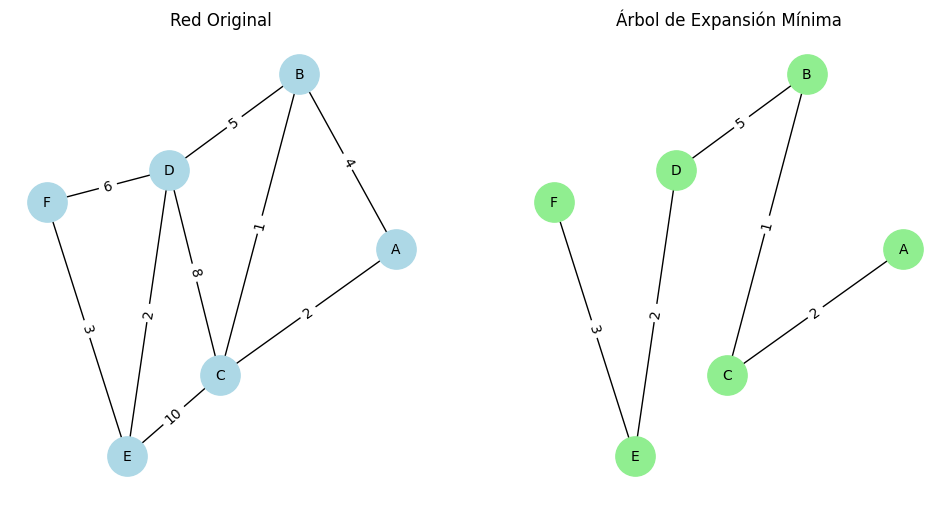

Distancia total del Árbol de Expansión Mínima: 13


In [6]:
import networkx as nx
import matplotlib.pyplot as plt

#Creamos una red

G = nx.Graph()

#Agregar nodos y aristas a la red
G.add_edge('A', 'B', weight=4)
G.add_edge('A', 'C', weight=2)
G.add_edge('B', 'C', weight=1)
G.add_edge('B', 'D', weight=5)
G.add_edge('C', 'D', weight=8)
G.add_edge('C', 'E', weight=10)
G.add_edge('D', 'E', weight=2)
G.add_edge('D', 'F', weight=6)
G.add_edge('E', 'F', weight=3)

#Obtenemo Árbol de Expansión Mínima

mst = nx.minimum_spanning_tree(G, algorithm='kruskal')

#Dibujamos la red original

plt.figure(figsize=(12, 6))
plt.subplot(121)
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=800, font_size=10)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title("Red Original")

#Dibujar Árbol de Expansión Mínima

plt.subplot(122)
nx.draw(mst, pos, with_labels=True, node_color='lightgreen', node_size=800, font_size=10)
labels_mst = nx.get_edge_attributes(mst, 'weight')
nx.draw_networkx_edge_labels(mst, pos, edge_labels=labels_mst)
plt.title("Árbol de Expansión Mínima")

plt.show()

#Mostrar el peso total del MST

distancia_total = sum(nx.get_edge_attributes(mst, 'weight').values())
print("Distancia total del Árbol de Expansión Mínima:", distancia_total)

Ruta más corta de A a F: ['A', 'C', 'B', 'D', 'E', 'F']
Ruta total: 13


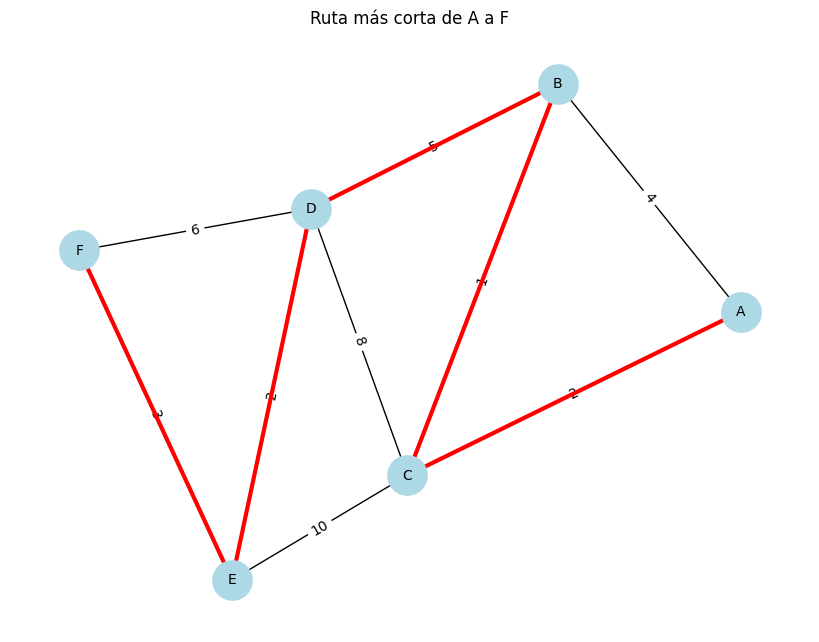

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

# Creamos la red
G = nx.Graph()
G.add_edge('A', 'B', weight=4)
G.add_edge('A', 'C', weight=2)
G.add_edge('B', 'C', weight=1)
G.add_edge('B', 'D', weight=5)
G.add_edge('C', 'D', weight=8)
G.add_edge('C', 'E', weight=10)
G.add_edge('D', 'E', weight=2)
G.add_edge('D', 'F', weight=6)
G.add_edge('E', 'F', weight=3)

# Definimos el origen y destino
origen = 'A'
destino = 'F'

# Encontramos la ruta más corta y su costo con Dijkstra
ruta = nx.shortest_path(G, source=origen, target=destino, weight='weight')
costo = nx.shortest_path_length(G, source=origen, target=destino, weight='weight')

print(f"Ruta más corta de {origen} a {destino}: {ruta}")
print(f"Ruta total: {costo}")

# Dibujar la red resaltando la ruta más corta
pos = nx.spring_layout(G, seed=42)

plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=800, font_size=10)

# Dibujamos las distancias
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

# Resaltamos la ruta más corta
ruta_edges = list(zip(ruta, ruta[1:]))  # pares consecutivos de la ruta
nx.draw_networkx_edges(G, pos, edgelist=ruta_edges, width=3, edge_color='red')

plt.title(f"Ruta más corta de {origen} a {destino}")
plt.show()

Flujo máximo de A a F: 6
Distribución de flujo en cada arista:
A: {'B': 4, 'C': 2}


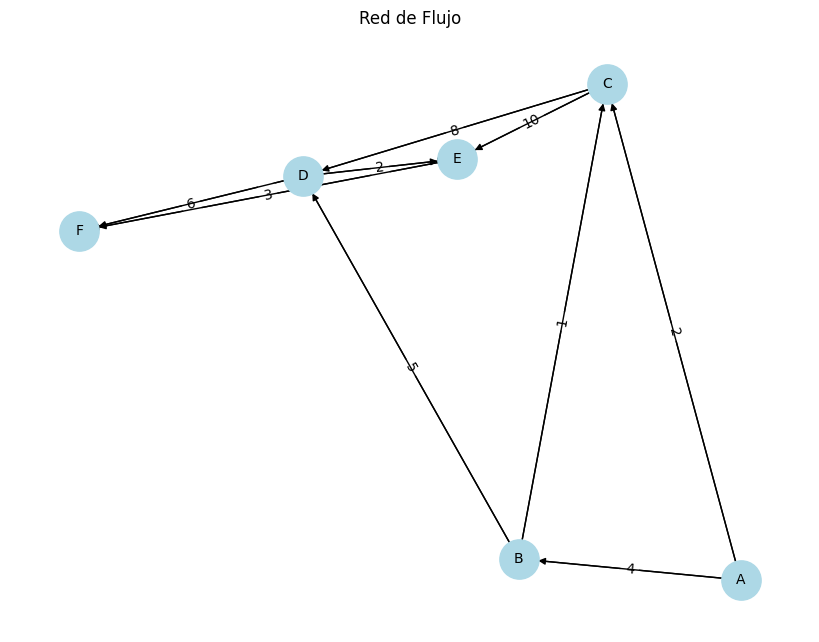

B: {'C': 0, 'D': 4}


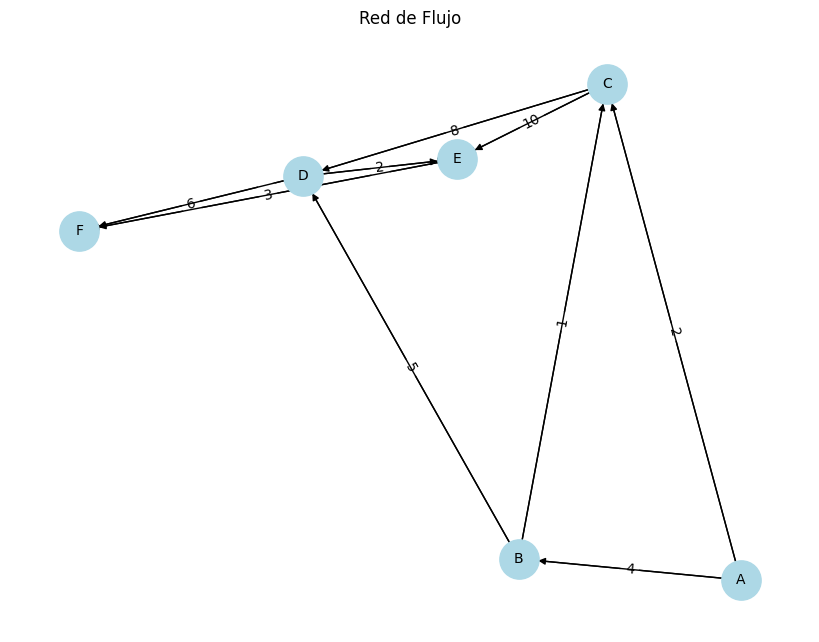

C: {'D': 2, 'E': 0}


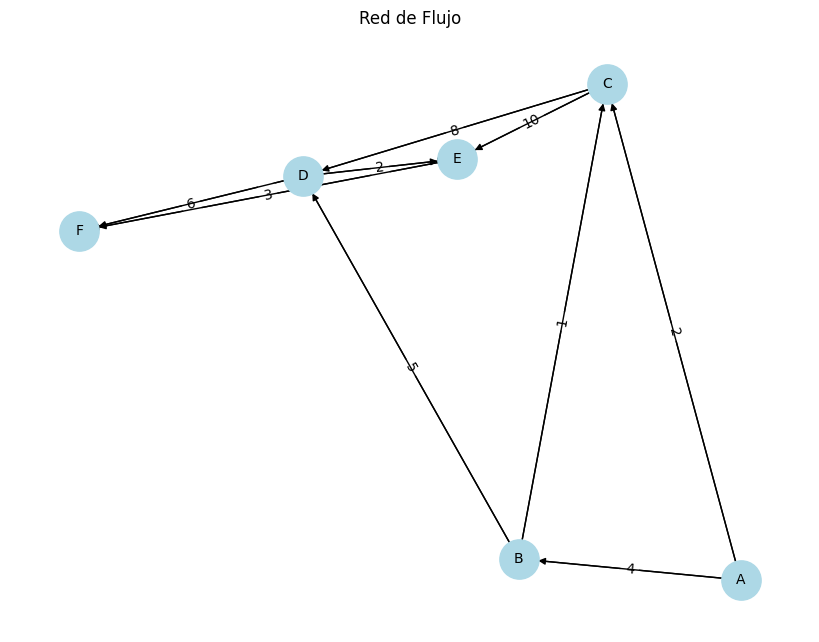

D: {'E': 0, 'F': 6}


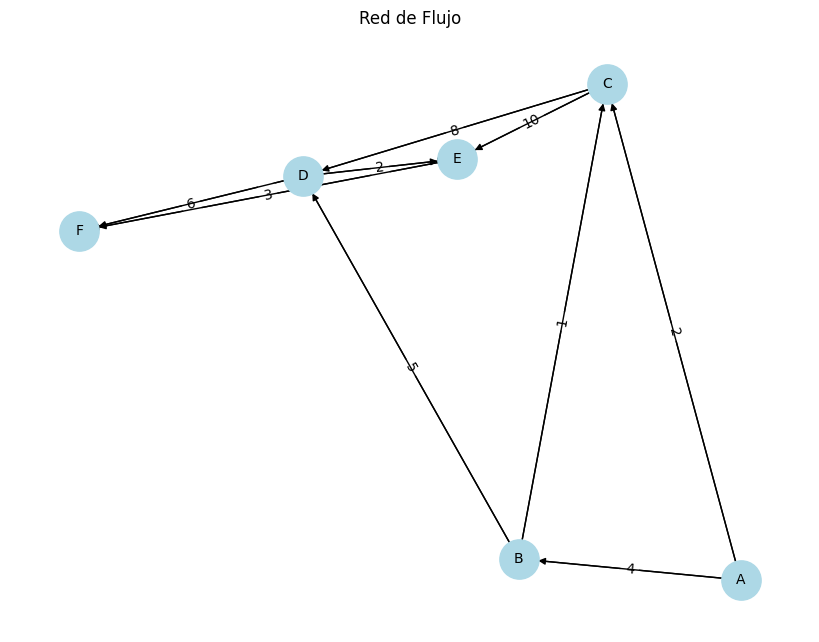

E: {'F': 0}


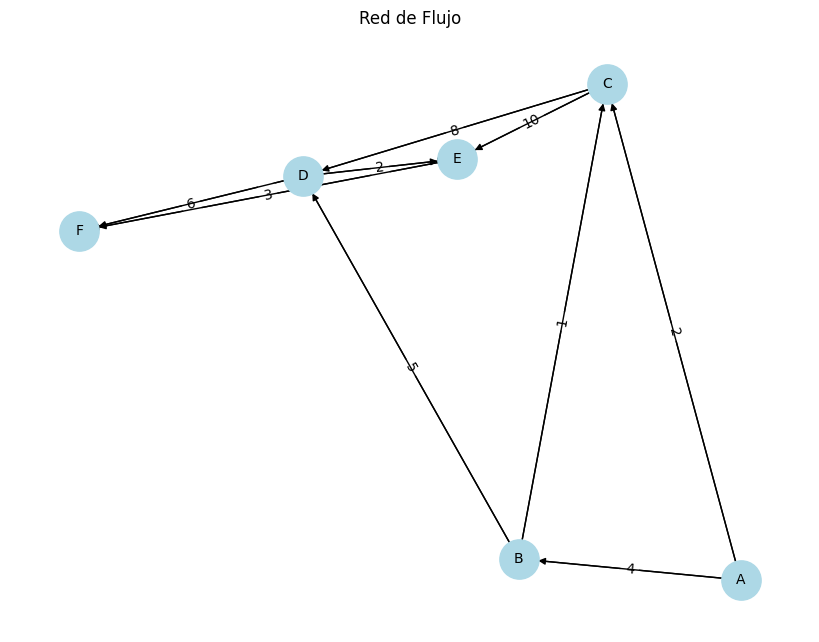

F: {}


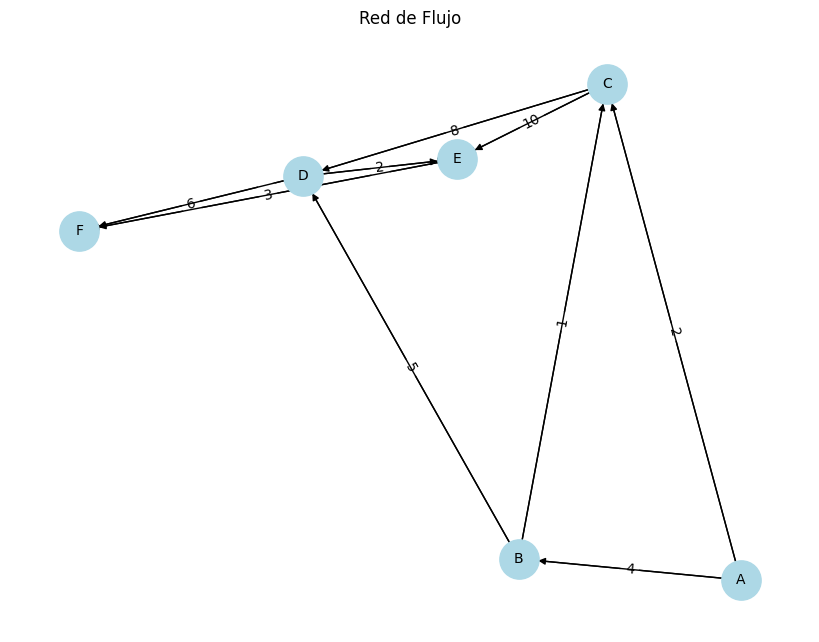

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

# Creamos un sistema de redes
G = nx.DiGraph()
G.add_edge('A', 'B', capacity=4)
G.add_edge('A', 'C', capacity=2)
G.add_edge('B', 'C', capacity=1)
G.add_edge('B', 'D', capacity=5)
G.add_edge('C', 'D', capacity=8)
G.add_edge('C', 'E', capacity=10)
G.add_edge('D', 'E', capacity=2)
G.add_edge('D', 'F', capacity=6)
G.add_edge('E', 'F', capacity=3)

# Definimos el nodo de inicio y el del final
source = 'A'
sink = 'F'

# Calculamos el flujo máximo
flow_value, flow_dict = nx.maximum_flow(G, source, sink)

print(f"Flujo máximo de {source} a {sink}: {flow_value}")
print("Distribución de flujo en cada arista:")
for nodo in flow_dict:
    print(f"{nodo}: {flow_dict[nodo]}")

    # Dibujamos la red de nodos
    pos = nx.spring_layout(G, seed=42)
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=800, font_size=10)

    # Definimos las capacidades
    labels = nx.get_edge_attributes(G, 'capacity')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

    # Dibujamos las aristas con dirección
    nx.draw_networkx_edges(G, pos, edgelist=G.edges(), arrows=True)

    plt.title(f"Red de Flujo")
    plt.show()